<a href="https://colab.research.google.com/github/hinga92/Arduino-Button-project/blob/master/Lab_1_Simon_Karanja_Hinga_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simon Karanja Hinga

# ELEN 521L: Lab 1 

Reading assignment :
1. How to read academic papers by Andrew Ng

2. Statistics review part



In [2]:
#Dive into Deep Learning book 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# create a jupyter notebook

# implement the relu function

def relu(x):
    return np.maximum(x, 0)

#Implement relu6 function

def relu6(x):
    return np.minimum(relu(x), 6)

#implement sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

#implement tanh function
def tanh(x):
    return np.tanh(x)

# implement the softmax functiom
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

# Test


In [3]:
x = np.array([
    [-2.0, 1.0,2.0,3.0],
    [-20.0,10.0,20.0,30.0],
    [-2000.0,1000.0,2000.0,3000.0]])

In [5]:
relu(x)

array([[0.e+00, 1.e+00, 2.e+00, 3.e+00],
       [0.e+00, 1.e+01, 2.e+01, 3.e+01],
       [0.e+00, 1.e+03, 2.e+03, 3.e+03]])

In [6]:
relu6(x)

array([[0., 1., 2., 3.],
       [0., 6., 6., 6.],
       [0., 6., 6., 6.]])

In [7]:
sigmoid(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


array([[1.19202922e-01, 7.31058579e-01, 8.80797078e-01, 9.52574127e-01],
       [2.06115362e-09, 9.99954602e-01, 9.99999998e-01, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [8]:
tanh(x)

array([[-0.96402758,  0.76159416,  0.96402758,  0.99505475],
       [-1.        ,  1.        ,  1.        ,  1.        ],
       [-1.        ,  1.        ,  1.        ,  1.        ]])

In [9]:
softmax(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0., nan, nan, nan]])

# Check distribution of operation
## create distribution for x and w

In [10]:
S = 100000
N = 10

x = np.random.normal(loc=0, scale=1, size=(S,N))
w = np.random.normal(loc=0, scale=1, size=(S,N))

# Compute output Distribution


In [11]:
y = relu(np.sum(w * x, axis=1))
print(np.mean(y), np.var(y))

1.2303957332018174 3.484124488773368


# Let assume Variance of x range from 0 to 3 and compute Distribution of y

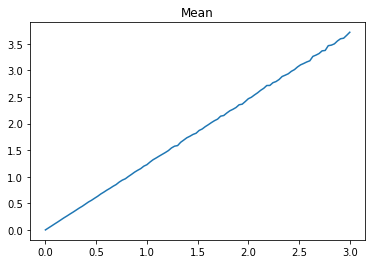

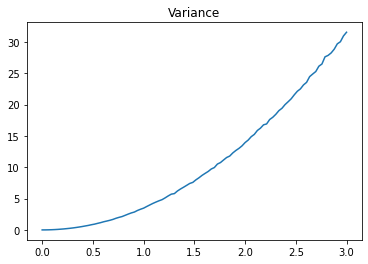

In [12]:
means = []
variances = []
scales = np.linspace(0, 3, 100)

for s in scales:
    x = np.random.normal(loc=0, scale=s, size=(S, N))
    y = relu(np.sum(w * x, axis=1))
    means.append(np.mean(y))
    variances.append(np.var(y))
    
plt.plot(scales, means)
plt.title('Mean')
plt.show()
plt.plot(scales, variances)
plt.title('Variance')
plt.show()

# Find the relation for Mean and Variance

In [13]:
p = np.polyfit(scales, means, 1)
x_poly_mean = np.poly1d(p)
print(x_poly_mean)

 
1.231 x + 0.0004842


In [14]:
# larger sample size for distribution give us a good result

S = 1000000
N = 10

#  let's assume 'b' is 0

b = np.random.normal(loc=0, scale=1, size=(S,))
x = np.random.normal(loc=0, scale=1, size=(S, N))
W = np.random.normal(loc=0, scale=1, size=(S, N))

y = np.sum(W * x, axis=1) + b

print('sampled distribution:', np.mean(y), np.var(y))


print('formula distribution:', 0, np.var(b) + np.var(w) * 
      np.mean(np.sum(x**2, axis=1) / N))

sampled distribution: 9.94801898334373e-06 11.030322496429232
formula distribution: 0 1.9988226476791724


#Conclusion based on the numbers
The sample distribution results (11.010822161908205) to a number close to the presummed value of N = 10
the formula distribution gives the exact value obtained based on calculation done using the [y = np.sum(W * x, axis=1) + b] formula

# Prove the formula for 𝜎2𝑓(𝑖)

We can use the relationshop between variance and expected value of E(x):

$ \sigma = sqrt(Var(x))$

$ \sigma^2_F(i) = Var(x)$

$ Var = E[(x-u(x))^2)]$

$ \sigma = Var(x) = EX^2 -2uE(x) + Eu^2x^2$

But we have $E(x) = u(x) =u$ , therefore replacing this in the equation above,
We observe that $ \sigma= Var(x)= Ex^2-2u^2 + u^2 $
Resulting to: $E[x^2]-u^2$

$\sigma^2 =Var(2)= E(x^2)-u^2$


# Load Iris Dataset

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split


def load_iris():
    X, y = datasets.load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    return (X_train, y_train), (X_test, y_test)

# load the MNIST Dataset

In [20]:
from sklearn.datasets import load_digits
def load_mnist():
    X, y = load_digits(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return (X_train, y_train), (X_test, y_test)

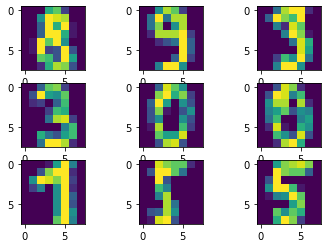

In [21]:
(x_train, y_train), (x_test, y_test) = load_mnist()

_, ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        idx = np.random.randint(x_train.shape[0])
        ax[i,j].imshow(x_train[idx].reshape(8,8))